# Mass-Radius relation of discovered exoplanets

The NASA Exoplanet Archive provides data and various tools related to exoplanets. See for example the table of confirmed exoplanet data here: http://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets.

While we can make scatter plots and histograms in the website, we would like to play with the data and do some advanced visualization and analysis. Thanks to the provision of the API, we can query data directly from: 
http://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html

In this notebook, I want to explore on mass-radius relation of all catalogued confirmed exoplanets. It is assumed that the mass and radius measurements (whether true or not) are adapted. Deviations due to empirical errors are assumed to be negligible when data is not available. 

Importance of M-R relation:
* estimating mass when only radius is available (such as for transiting planets)

References (not exhaustive):
* THE MASS-RADIUS RELATION FOR 65 EXOPLANETS SMALLER THAN 4 EARTH RADII (Weiss & Marcy 2014; https://arxiv.org/pdf/1312.0936v4.pdf)
* THE MASS–METALLICITY RELATION FOR GIANT PLANETS (Thorngren et al. 2016; http://iopscience.iop.org/article/10.3847/0004-637X/831/1/64/pdf)
* Exploring exoplanet populations with NASA’s Kepler Mission (Batalha 2014; https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4156715/)

In [3]:
from datetime import datetime as dt

print('Last accessed on: {}'.format(dt.now()))

Last accessed on: 2016-11-22 23:22:15.155000


In [1]:
# Python 2 and 3 compatible
try:
    from urllib.request import urlopen, Request
    from urllib.error import HTTPError
except ImportError:
    from urllib2 import urlopen, Request, HTTPError
import time
import warnings
warnings.filterwarnings('ignore')

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
pl_params = "pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_radj,pl_radjerr1,pl_radjerr2,pl_dens,pl_instrument,pl_insol,pl_eqt,"
pl_err = 'pl_bmassjerr1,pl_bmassjerr2,pl_bmassjerr1,pl_bmassjerr2,pl_orbpererr1,pl_orbpererr2,'
st_params = "st_optmag,ra,dec,st_dist,st_teff,st_mass,st_rad,st_plx,gaia_plx,gaia_dist,st_pm,gaia_pm,st_radv,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age,st_acts,st_bmvj,st_jmh2,"
others = 'pl_instrument,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink'
full_url= url+'&select='+ pl_params + pl_err + st_params+others

response = urlopen(full_url)
html = response.read()

outpath_extended = 'confirmed_planets_extended_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download

print("Downloading data from URL:\n{}".format(url))

with open('data/'+outpath_extended,'wb') as f:
     f.write(html)
print("Saved file as {}".format(outpath_extended))

In [5]:
import pandas as pd

df = pd.read_csv('data/'+outpath_extended)
df.head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,st_metfeblend,st_metratio,st_age,st_ageerr1,st_ageerr2,st_agelim
0,TrES-2,b,Transit,1,2.470613,9.000000e-08,-9.000000e-08,0.0,0.03670,0.00140,...,-0.15,0.10,-0.10,0.0,0.0,[Fe/H],NaN,NaN,NaN,0.0
1,HAT-P-7,b,Transit,1,2.204737,1.100000e-06,-1.100000e-06,0.0,0.03676,0.00019,...,0.15,0.08,-0.08,0.0,0.0,[Fe/H],NaN,NaN,NaN,0.0
2,HAT-P-11,b,Transit,1,4.887816,7.100000e-06,-7.100000e-06,0.0,0.05300,0.00020,...,0.31,0.05,-0.05,0.0,0.0,[Fe/H],6.5,5.9,-4.1,0.0
3,Kepler-5,b,Transit,1,3.548466,7.000000e-07,-7.000000e-07,0.0,0.05380,0.00150,...,0.04,0.06,-0.06,0.0,0.0,[Fe/H],NaN,NaN,NaN,0.0
4,Kepler-6,b,Transit,1,3.234700,4.000000e-07,-4.000000e-07,0.0,0.04852,0.00074,...,0.34,0.04,-0.04,0.0,0.0,[Fe/H],NaN,NaN,NaN,0.0


In [7]:
df.shape

(3483, 187)

In [8]:
idx1 = df['pl_discmethod'] == 'Transit'
df_transit = df[idx1]

idx2 = df['pl_discmethod'] == 'Radial Velocity'
df_RV = df[idx2]

# Mass-Radius Relation (combined)

![rocky planets](figures/trappist-1 planets.png)

![Zeng et al. 2016](figures/Zeng2016b.png)

In [ ]:
plt.rcParams.update({'font.size': 22})

names='Jupiter,Saturn,Uranus,Neptune,Earth,Venus,Mars,Ganymede,Titan,Mercury,Callisto,Io,Moon,Europa,Triton,Pluto,Eris,Titania,Rhea,Oberon,Iapetus,Haumea,Charon,Umbriel,Ariel,Dione,Quaoar,Tethys,Ceres'.split(',')
#km
radii=[69911, 58232, 25362, 24622, 6371, 6051.8, 3389.5, 2634.1, 2576, 2439.7, 2410.3, 1821.6, 1737.1, 1560.8, 1353.4, 1186, 1163, 788.4, 763.8, 761.4, 734.5, 620, 606, 584.7, 578.9, 561.4, 555, 531.1, 473]
# x 1e21 kg
masses=[1898600, 568460, 86832, 102430, 5973.6, 4868.5, 641.85, 148.2, 134.5, 330.2, 107.6, 89.3, 73.5, 48, 21.5, 13.105, 16.7, 3.526, 2.3166, 3.014, 1.9739, 4.006, 1.52, 1.2, 1.35, 1.096, 1.4, 0.6173, 0.939]

df_ss=pd.DataFrame({'name': names, 'mass': masses, 'radius': radii})
df_ss['massE']=df_ss['mass']*1e21/M_E
df_ss['g_E']=G/g_E*df_ss['mass']*1e21/(df_ss['radius']*1e3)**2

fig, ax = plt.subplots(1,1, figsize=(10,10))
df.plot(x='pl_bmassE',y='pl_g_E', kind='scatter', loglog=True, 
        ax=ax, alpha=0.5, label='exoplanets')
df_ss.plot(x='massE',y='g_E', kind='scatter', loglog=True, 
           color='g', ax=ax, label='solar system objects')

### low-surf log g
sample=["WASP-21","HAT-P-12","HAT-P-44"]
colors='r m y'.split()
for i,c in zip(sample, colors):
    p=df.query('pl_hostname == "{}"'.format(i))
    l = '{} b'.format(i)
    p.plot(x='pl_bmassE',y='pl_g_E', kind='scatter', loglog=True, 
           color=c, label=l, ax=ax)
#     if len(p['pl_letter']) > 1:
#         n='{0} {1}'.format(p['pl_hostname'].values[0], p['pl_letter'].values[0])
#         ax.text(p['pl_bmassj'].values[0], p['pl_g'].values[0], n)#, color='r')
plt.xlabel('planet mass [M$_{\oplus}$]')
plt.ylabel('planet g [g$_{\oplus}$]')

In the first regime, planetary radius grows with mass as R ~ M$^{1/4}$; therefore surface gravity grows as gs ~ M$^{1/2}$ (faster than what would be expected for incompressible bodies, gs ~ M$^{1/3}$). On the other hand, for gas worlds, planetary radius remains roughly constant (i.e., gas giants with very different masses have similar sizes due to electron degeneracy), so surface gravity grows linearly with mass, gs ~ M. But in the transition zone, we find some sort of plateau where planetary radius has the fastest growth, as R ~ M$^{1/2}$, which thereby yields a constant surface gravity roughly similar to that of Earth.

The accretion process and the competition for materials during planetary formation impose severe constraints on feasible planets. Current models of population synthesis (Mordasini et al., 2015) are designed to take this into account and can address many of the observed features. However, such models fail to explain this plateau and predict instead a noticeable increasing trend in surface gravities in this region.

All of the seven known potentially habitable exoplanets have nearly the same surface gravity, if the estimates of their mass and radius are correct:
```
Name: Mass, Radius, Surface Gravity
Gliese 581g: 2.6, 1.4, 1.33

Gliese 581d: 6.9, 2.2, 1.43

Gliese 667Cc: 4.9, 1.9, 1.36

Kepler 22b: 6.4, 2.1, 1.45

HD40307g: 8.2, 2.4, 1.42

HD85512b: 4.0, 1.7, 1.38

Gliese 163c: 8.0, 2.4, 1.39

Fictional Planet: 8.0, 2.83, 1.00
```

In [ ]:
# import mpld3
# mpld3.enable_notebook()

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#set plotting style
plt.style.use('seaborn-whitegrid')
#set font size
plt.rcParams.update({'font.size': 22})

import matplotlib.cm as cm

groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in list(zip(groups,colors))[::-1]: #plot in reverse order for visual clarity
    ax.plot(group[1]['pl_orbsmax'],group[1]['pl_radj'], 'o', 
            color=color,label=group[0]);#, alpha=0.3);
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Mass (M$_{Jup}$)')
ax.set_ylabel('Radius (R$_{Jup}$)')
ax.legend(fontsize=14)

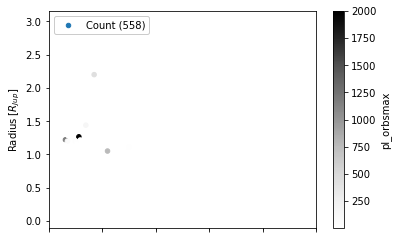

In [11]:
import matplotlib as mpl
import pylab as pl
%matplotlib inline

num=len(df.query('pl_radj > 0 and pl_bmassj > 0 and pl_radj > 0'))
df.plot.scatter(x='pl_bmassj', y='pl_radj', c='pl_orbsmax', label='Count ({})'.format(num));
pl.xlabel('Mass [$M_{Jup}$]')
pl.ylabel('Radius [$R_{Jup}$]')
pl.xlim([1e-4,1e2])
#pl.xscale('log')
#pl.yscale('log')
leg = pl.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(1)

The theoretical M-R curves for hot Jupiter was discussed in [Fortney, Marley & Barns (2007)](http://iopscience.iop.org/article/10.1086/512120/pdf). The goal is to create a similar plot using real data. The plot should have same scale as Fig. 7 in the paper.

In [12]:
from IPython.display import Image

loc='C:\Users\Jerome\Box Sync\research papers\images\plots\mass vs radius (Fortney 2007).png'
Image(loc)

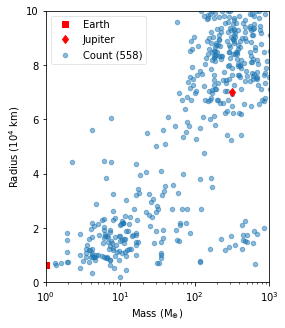

In [33]:
import matplotlib as mpl
import pylab as pl
%matplotlib inline
    
#create new column for radius in 1e4 km
R_Jup = 69911 #km
df['pl_rad_1e4'] = df.pl_radj*R_Jup/1e4

#create new column for mass in M_Earth
M_Jup = 1.898e27 #kg
M_Earth = 5.972e24 #kg
df['pl_mass_E'] = df.pl_bmassj*M_Jup/M_Earth

R_Earth = 6371 #km
num=len(df.query('pl_radj > 0 and pl_bmassj > 0 and pl_radj > 0'))

fig, ax = pl.subplots(figsize=(4,5))
df.plot.scatter(x='pl_mass_E', y='pl_rad_1e4', alpha=0.5, label='Count ({})'.format(num), ax=ax);
ax.plot(M_Earth/M_Earth, R_Earth/1e4, 'rs', label='Earth')
ax.plot(M_Jup/M_Earth, R_Jup/1e4, 'rd', label='Jupiter')
pl.xlabel('Mass (M$_{\oplus}$)')
pl.ylabel('Radius (10$^4$ km)')
pl.xlim([1,1e3])
pl.ylim([0,1e1])
pl.xscale('log')
#pl.yscale('log')
leg = pl.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

In [79]:
rho_h2O=1
rho_Fe=7.874
rho_rock=5.51


rad = df.pl_radj.sort_values()*R_Jup*1000
mass_h2O = []
mass_Fe = []
mass_rock = []

for i in rad:
    mass_h2O.append(4./3.*np.pi*rho_h2O*1000*(i)**3/6.e24)
    mass_Fe.append(4./3.*np.pi*rho_Fe*1000*(i)**3/6.e24)
    mass_rock.append(4./3.*np.pi*rho_rock*1000*(i)**3/6.e24)

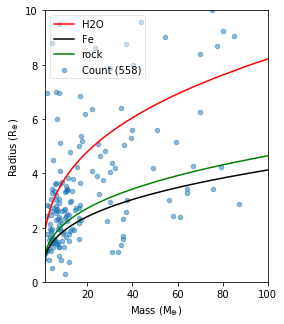

In [83]:
import matplotlib as mpl
import pylab as pl
%matplotlib inline

#create new column for radius in 1e4 km
R_Jup = 69911 #km
df['pl_rad_1e4'] = df.pl_radj*R_Jup/R_Earth

#create new column for mass in M_Earth
M_Jup = 1.898e27 #kg
M_Earth = 5.972e24 #kg
df['pl_mass_E'] = df.pl_bmassj*M_Jup/M_Earth

R_Earth = 6371 #km
num=len(df.query('pl_radj > 0 and pl_bmassj > 0 and pl_radj > 0'))

fig, ax = pl.subplots(figsize=(4,5))
df.plot.scatter(x='pl_mass_E', y='pl_rad_1e4', alpha=0.5, label='Count ({})'.format(num), ax=ax);
plt.plot(mass_h2O, rad/(R_Earth*1000), 'r-',label='H2O')
plt.plot(mass_Fe, rad/(R_Earth*1000), 'k-',label='Fe')
plt.plot(mass_rock, rad/(R_Earth*1000), 'g-',label='rock')
#ax.loglog(M_Earth/M_Earth, R_Earth, 'rs', label='Earth')
#ax.loglog(M_Jup/M_Earth, R_Jup, 'rd', label='Jupiter')
pl.xlabel('Mass (M$_{\oplus}$)')
pl.ylabel('Radius (R$_{\oplus}$)')
pl.xlim([1,100])
pl.ylim([0,10])
#pl.xscale('log')
#pl.yscale('log')
leg = pl.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

How many planets have measured mass and radius?

In [15]:
df.query('pl_radj > 0 and pl_bmassj > 0').pl_discmethod.value_counts()


Transit                          522
Radial Velocity                   14
Imaging                           12
Transit Timing Variations          7
Orbital Brightness Modulation      3
Name: pl_discmethod, dtype: int64

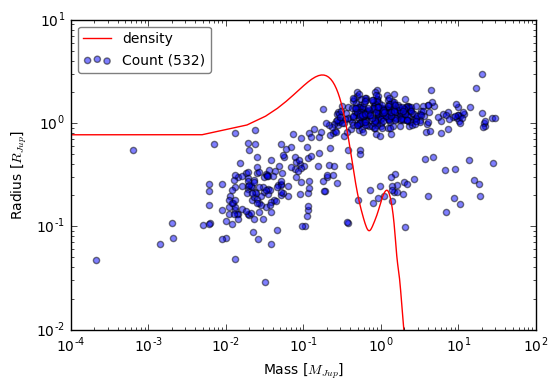

In [7]:
import matplotlib as mpl
import pylab as pl
%matplotlib inline

num=len(df.query('pl_radj > 0 and pl_bmassj > 0 and pl_radj > 0'))
label1= 'Count ({})'.format(num)

fig, axs =pl.subplots()
ax=df.plot.scatter(x='pl_bmassj', y='pl_radj', alpha=0.5, label=label1,ax=axs);
ax=df.plot.density(x='pl_bmassj', y='pl_radj', c='r',ax=ax); #same as kde
pl.xlabel('Mass [$M_{Jup}$]')
pl.ylabel('Radius [$R_{Jup}$]')
ax.set_xlim([1e-4,1e2])
ax.set_ylim([1e-2,1e1])
ax.set_xscale('log')
ax.set_yscale('log')

label2='density'
leg = pl.legend([label2,label1], fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

# Mass-Radius Relation (Transit)

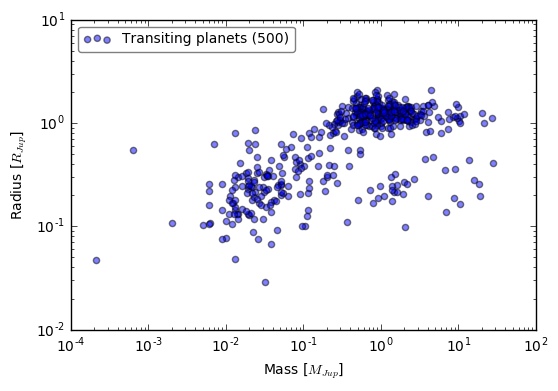

In [44]:
import matplotlib as mpl
import pylab as pl
%matplotlib inline

num=len(df_transit.query('pl_radj > 0 and pl_bmassj > 0 and pl_radj > 0'))
df_transit.plot.scatter(x='pl_bmassj', y='pl_radj', alpha=0.5, label='Transiting planets ({})'.format(num));
pl.xlabel('Mass [$M_{Jup}$]')
pl.ylabel('Radius [$R_{Jup}$]')
pl.xlim([1e-4,1e2])
pl.xscale('log')
pl.yscale('log')
leg = pl.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

# Mass-Radius Relation (RV)

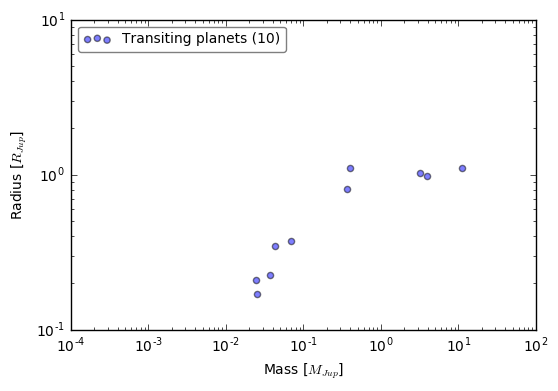

In [45]:
import matplotlib as mpl
import pylab as pl
%matplotlib inline

num=len(df_RV.query('pl_radj > 0 and pl_bmassj > 0 and pl_radj > 0'))
df_RV.plot.scatter(x='pl_bmassj', y='pl_radj', alpha=0.5, label='Transiting planets ({})'.format(num));
pl.xlabel('Mass [$M_{Jup}$]')
pl.ylabel('Radius [$R_{Jup}$]')
pl.xlim([1e-4,1e2])
pl.xscale('log')
pl.yscale('log')
leg = pl.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

# Mass - orbital distance

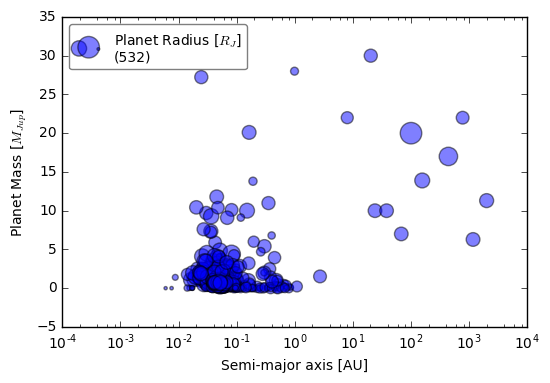

In [18]:
import matplotlib as mpl
import pylab as pl
%matplotlib inline

num=len(df.query('pl_radj > 0 and pl_bmassj > 0 and pl_radj > 0'))
df.plot.scatter(x='pl_orbsmax', y='pl_bmassj', s=df['pl_radj']*80, alpha=0.5, label='Planet Radius [$R_J$]\n({})'.format(num));
pl.ylabel('Planet Mass [$M_{Jup}$]')
pl.xlabel('Semi-major axis [AU]')
#pl.xlim([5e-3, 1e5])
pl.xscale('log')
#pl.yscale('log')
leg = pl.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

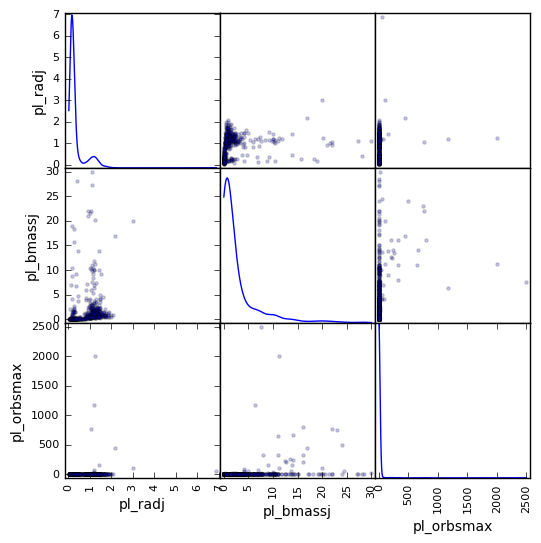

In [70]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df[['pl_radj', 'pl_bmassj', 'pl_orbsmax']], alpha=0.2, figsize=(6, 6), diagonal='kde');

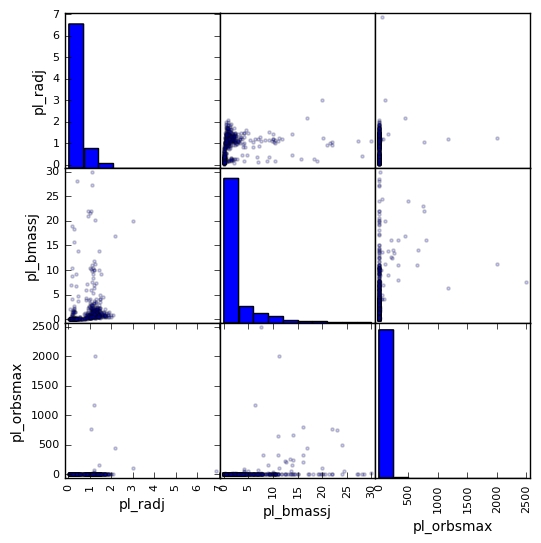

In [69]:
scatter_matrix(df[['pl_radj', 'pl_bmassj', 'pl_orbsmax']], alpha=0.2, figsize=(6, 6), diagonal='hist');

In [157]:
df.columns

Index([u'pl_hostname', u'pl_letter', u'pl_discmethod', u'pl_pnum',
       u'pl_orbper', u'pl_orbpererr1', u'pl_orbpererr2', u'pl_orbperlim',
       u'pl_orbpern', u'pl_orbsmax', u'pl_orbsmaxerr1', u'pl_orbsmaxerr2',
       u'pl_orbsmaxlim', u'pl_orbsmaxn', u'pl_orbeccen', u'pl_orbeccenerr1',
       u'pl_orbeccenerr2', u'pl_orbeccenlim', u'pl_orbeccenn', u'pl_orbincl',
       u'pl_orbinclerr1', u'pl_orbinclerr2', u'pl_orbincllim', u'pl_orbincln',
       u'pl_bmassj', u'pl_bmassjerr1', u'pl_bmassjerr2', u'pl_bmassjlim',
       u'pl_bmassn', u'pl_bmassprov', u'pl_radj', u'pl_radjerr1',
       u'pl_radjerr2', u'pl_radjlim', u'pl_radn', u'pl_dens', u'pl_denserr1',
       u'pl_denserr2', u'pl_denslim', u'pl_densn', u'pl_ttvflag',
       u'pl_kepflag', u'pl_k2flag', u'ra_str', u'dec_str', u'ra', u'st_raerr',
       u'dec', u'st_decerr', u'st_posn', u'st_dist', u'st_disterr1',
       u'st_disterr2', u'st_distlim', u'st_distn', u'st_optmag',
       u'st_optmagerr', u'st_optmaglim', u'st_optmagb

### Pairplots
This is a powerful way to survey relationship among variables. A particular scattered pairplot implies no correlation while a distribution with a definite slope implies otherwise. Be sure to try varying the keyword parameters.

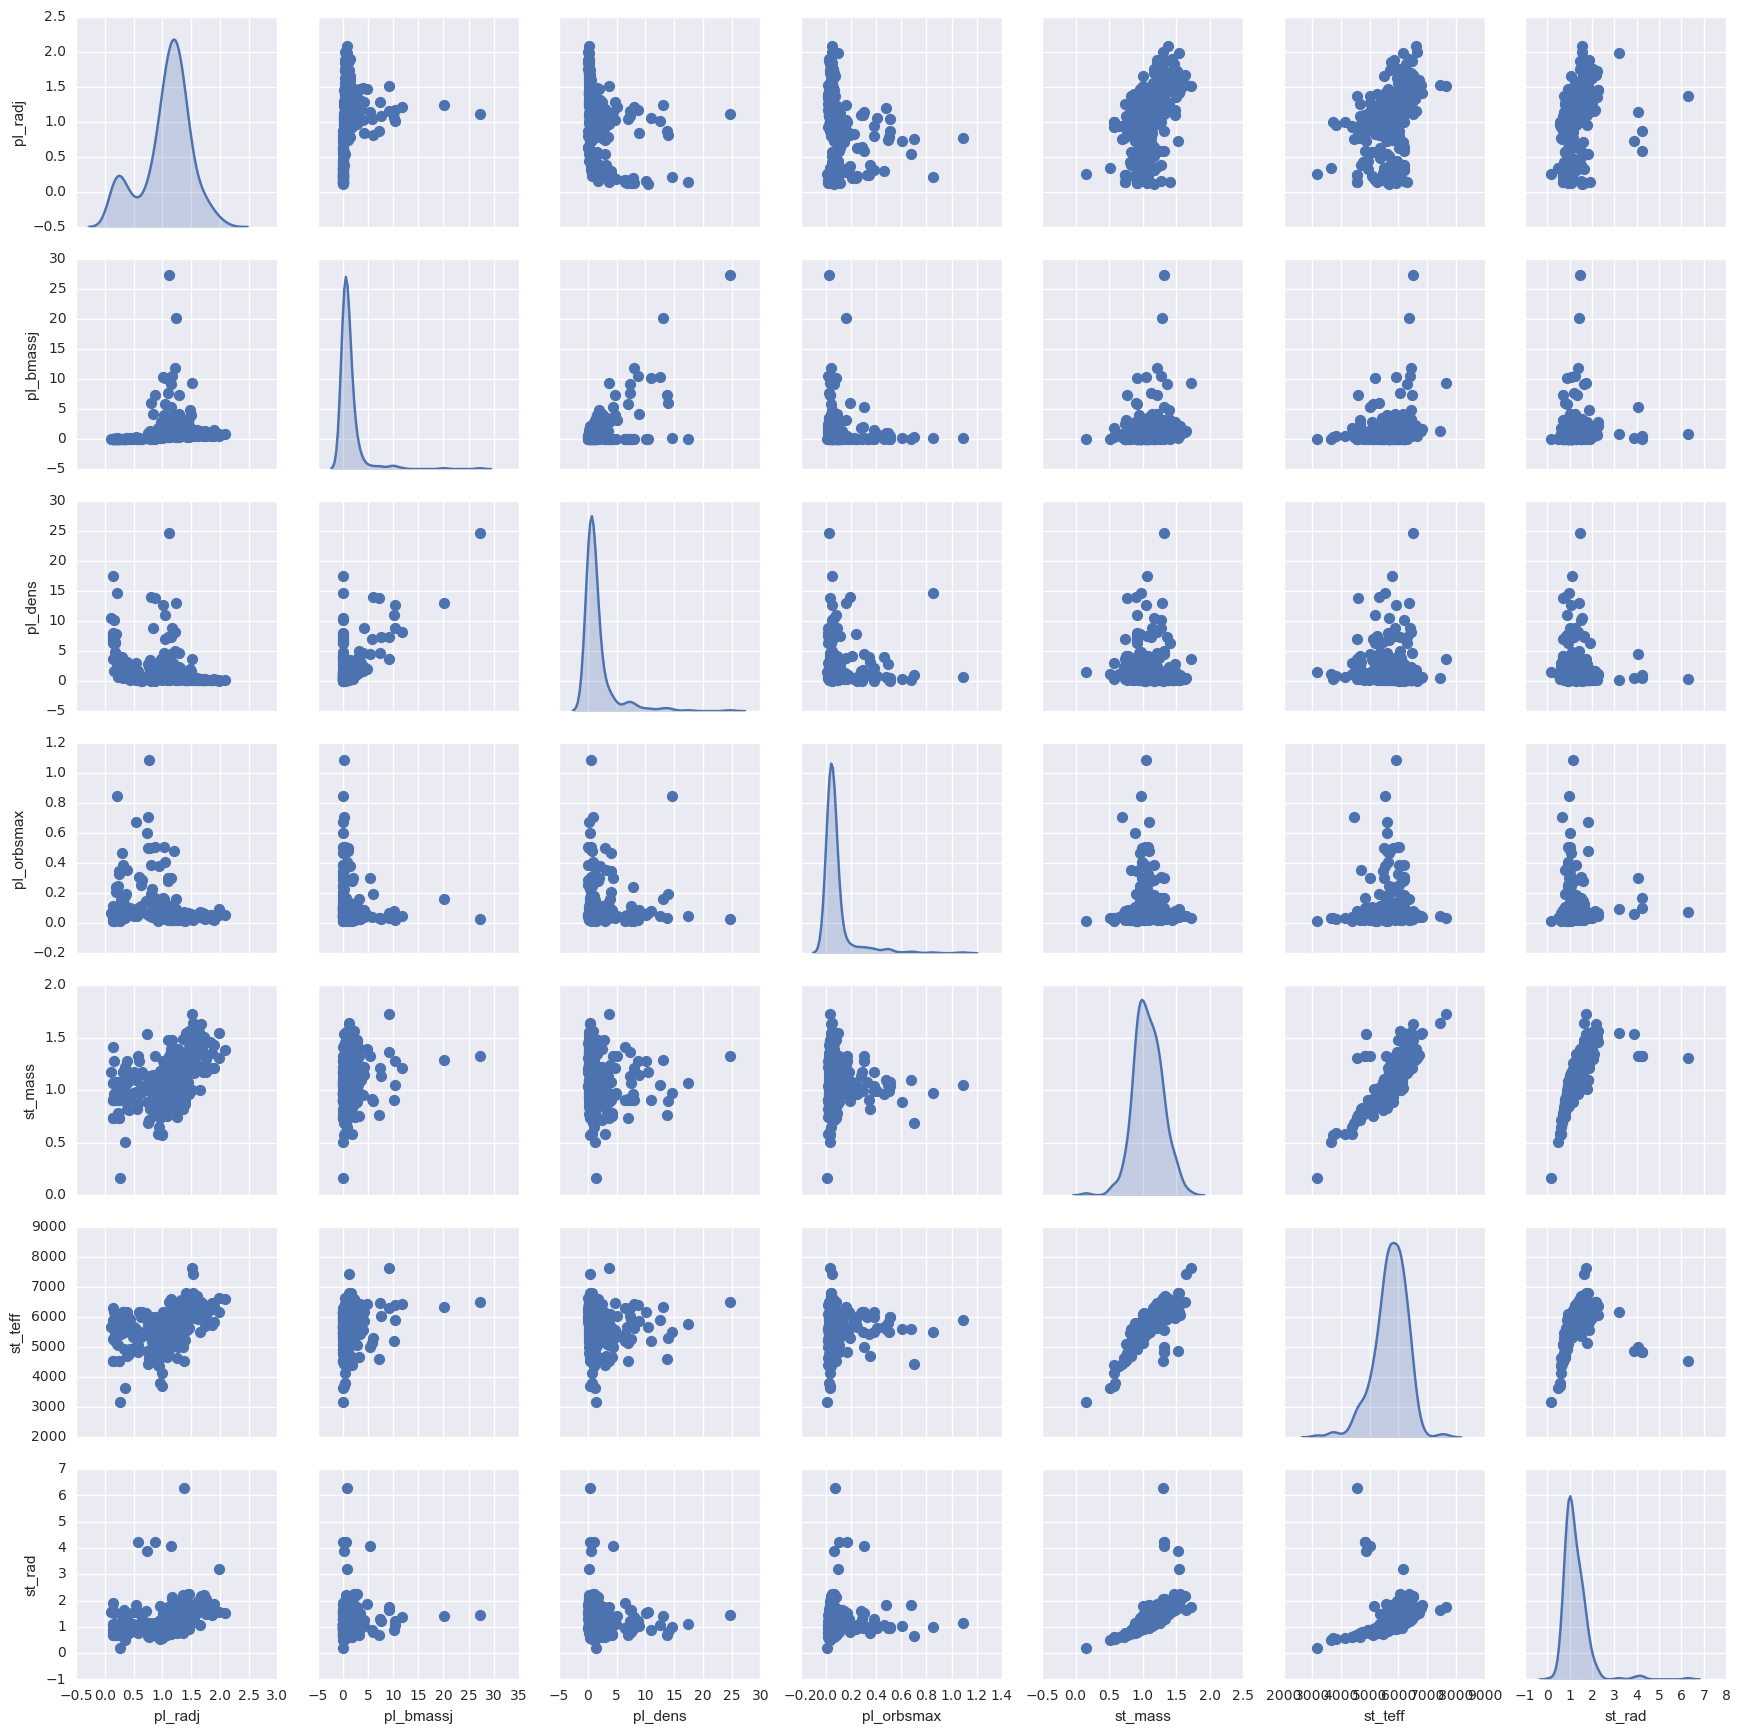

In [168]:
variables=df[['pl_radj', 'pl_bmassj', 'pl_dens', 'pl_orbsmax',"st_mass","st_teff","st_rad"]].dropna()
sb.pairplot(variables, diag_kind="kde", plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True));
#, hue="pl_discmethod", markers="+"

## Paiplot with regression
This does not yield good diagonal plots (regression lines not seen) due to offset.

In [2]:
#sb.pairplot(df[['pl_radj', 'pl_bmassj', 'pl_dens', 'pl_orbsmax',"st_mass","st_teff","st_rad"]].dropna(), diag_kind="reg")

In [1]:
from pandas.tools.plotting import bootstrap_plot
#for  visually assessment of the uncertainty of a statistic: mean, median, and midrange
#bootstrap_plot(df.pl_bmassj, size=50, samples=500, color='grey')

In [76]:
from pandas.tools.plotting import radviz
radviz?
#radviz(df.pl_radj, 'pl_discmethod')

The plot below is probably useful for determining multiple variables as a function of the last (i.e. pl_orbsmax)
It is also seen here the continuity of data for the 3 parameters. Take note of the spikes and sparse (desert) regions.

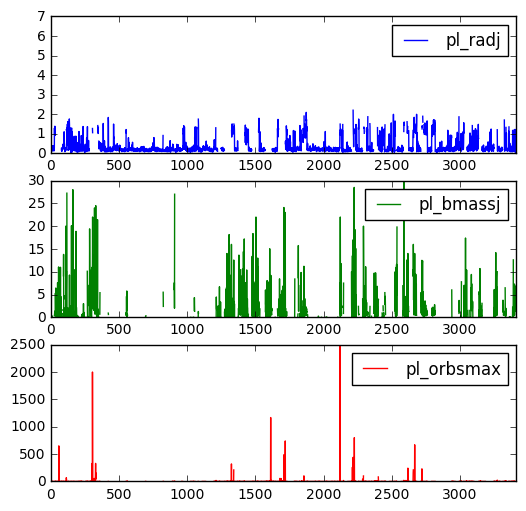

In [92]:
df[['pl_radj', 'pl_bmassj', 'pl_orbsmax']].plot(subplots=True, figsize=(6, 6), sharex=False);

# M-R relation

In [9]:
#Constants that will be useful later
M_E = 5.972e24 #kg
a_E = 149.60e6 #m 
R_E = 6371e3 #km
P_E = 365 #d

M_J = 1.898e27 #kg
a_J = 778.57e6 #m
R_J = 69911e3 #m
P_J = 11.86*P_E

M_N = 1.024e26
a_N = 4495.06e6 #m
R_N = 24622e3 #m
P_N = 164.8*P_E

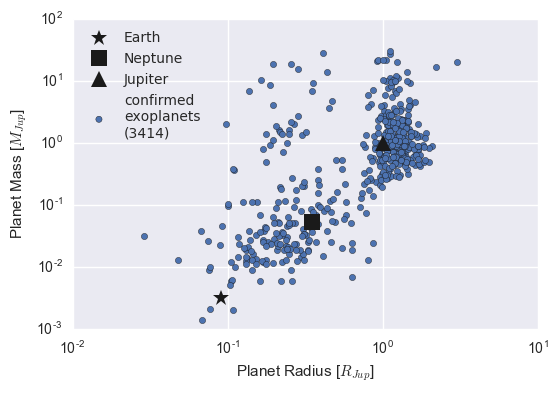

In [105]:
import matplotlib.pyplot as pl
%matplotlib inline

#pl.scatter(df['pl_radj'],df['pl_bmassj'], label='confirmed\nexoplanets ({})'.format(len(df)))
df.plot.scatter(x='pl_radj', y='pl_bmassj', label='confirmed\nexoplanets\n({})'.format(len(df)))
pl.xlabel('Planet Radius [$R_{Jup}$]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
#pl.xlim([5e-3, 1e5])
pl.xscale('log')
pl.yscale('log')
pl.plot(R_E/R_J,M_E/M_J,'k*', markersize=12, label='Earth')
pl.plot(R_N/R_J,M_N/M_J,'ks', markersize=12, label='Neptune')
pl.plot(1,1,'k^', markersize=12, label='Jupiter')
leg = pl.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

# Removing Inflated Hot Jupiters (IHJs)

From hereon, we will consider only planets whose stellar insolations are low enough ( F* < 2 × 108 erg s−1 cm−2 , or roughly Teff < 1000) that they are not affected by the hot-Jupiter radius inflation mechanism (e.g., Thorngren et al. 2016).

Insolation flux is another way to give the equilibrium temperature. It is given in units relative to those measured for the Earth from the Sun.

In [31]:
df.pl_insol.count()

138

Only few have value for planet insolation temperature.

In [34]:
df.query('pl_insol >= 1000')['pl_insol'].values

array([ 1124.,  1212.,  1686.,  9640.])

In fact, only 4 planets satisfy our constraint.

The plot below is better suited for dense regimes such that for hot Jupiters.

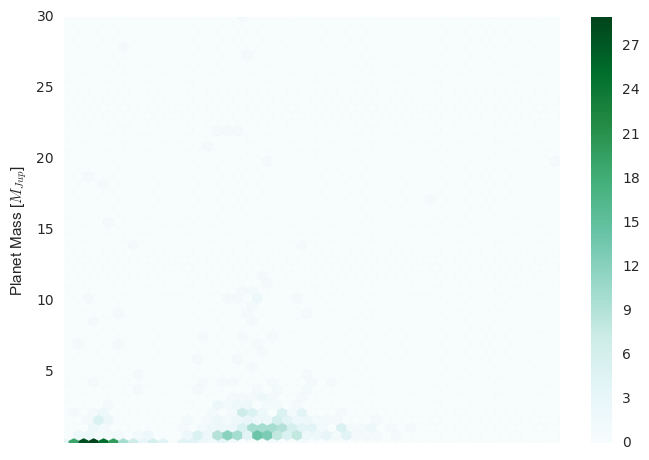

In [139]:
df.plot.hexbin(x='pl_radj', y='pl_bmassj', gridsize=50, label='confirmed\nexoplanets\n({})'.format(len(df)))
pl.xlabel('Planet Radius [$R_{Jup}$]')
pl.ylabel('Planet Mass [$M_{Jup}$]')

### Multiple linear regression
Check regression line for each discovery method by setting hue=pl_disc_method. The problem encountered: LinAlgError("Arrays cannot be empty"). A remedy probably is to make another dataframe with only 2 or 3 detection methods. Therefore, the plot below shows only one regression line.

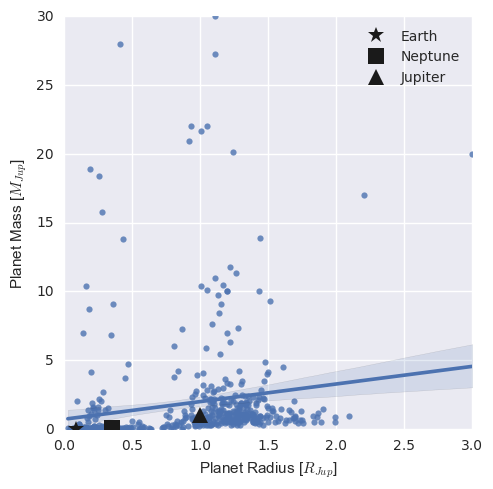

In [134]:
g = sb.lmplot(x='pl_radj', y='pl_bmassj', data=df, truncate=True)#, hue='pl_discmethod')#, label='confirmed\nexoplanets\n({})'.format(len(df)))
#g.set_axis_labels("Planet Radius [$R_{Jup}$]","Planet Mass [$M_{Jup}$]");
pl.ylim([0,30])
pl.xlim([0,3])
#pl.xscale('log')
#pl.yscale('log')
pl.xlabel('Planet Radius [$R_{Jup}$]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
pl.plot(R_E/R_J,M_E/M_J,'k*', markersize=12, label='Earth')
pl.plot(R_N/R_J,M_N/M_J,'ks', markersize=12, label='Neptune')
pl.plot(1,1,'k^', markersize=12, label='Jupiter')
leg = pl.legend(fancybox=True, loc='best', numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

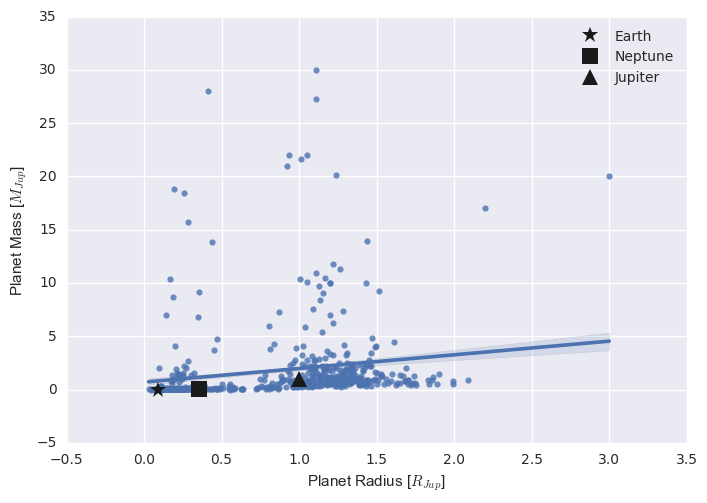

In [125]:
import seaborn as sb
sb.set(color_codes=True)

#similar to sb.regplot(x='pl_radj', y='pl_bmassj', data=df)
sb.regplot(x=df.pl_radj, y=df.pl_bmassj, ci=68, truncate=True) #ax=ax
pl.xlabel('Planet Radius [$R_{Jup}$]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
#pl.xlim([5e-3, 1e5])
#sb.set_xscale('log')
#sb.set_yscale('log')
pl.plot(R_E/R_J,M_E/M_J,'k*', markersize=12, label='Earth')
pl.plot(R_N/R_J,M_N/M_J,'ks', markersize=12, label='Neptune')
pl.plot(1,1,'k^', markersize=12, label='Jupiter')
leg = pl.legend(fancybox=True, loc='best', numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)
#x_ci='ci', scatter=True, robust=True, dropna=True, logx=True
#scatter_kws={"s": 80}, ci=None, truncate=True
#x_bins=4, x_estimator=np.mean, fit_reg=True, ci=[69,95,..], n_boot=500-1000, units=None, order=2, logistic=True, 
#lowess=False, robust=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, 
#y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None

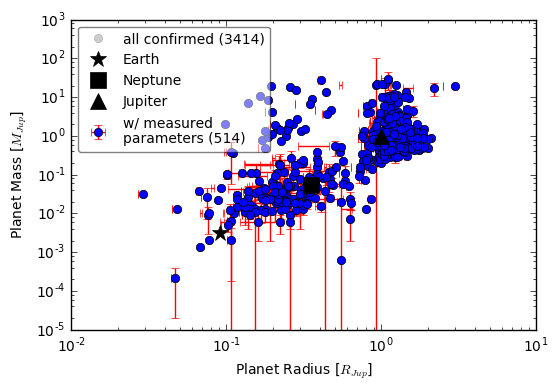

In [29]:
pl.plot(df['pl_radj'],df['pl_bmassj'], 'ko', alpha=0.2, label='all confirmed ({})'.format(len(df)))
pl.errorbar(df.pl_radj, df.pl_bmassj, xerr=[df.pl_radjerr1, df.pl_radjerr2], \
            yerr=[df.pl_bmassjerr1, df.pl_bmassjerr1], fmt='o', ecolor='r', \
           label='w/ measured\nparameters ({})'.format(len(df.query('pl_radj > 0 and pl_bmassj > 0'))))
pl.xlabel('Planet Radius [$R_{Jup}$]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
#pl.xlim([5e-3, 1e5])
pl.xscale('log')
pl.yscale('log')
pl.plot(R_E/R_J,M_E/M_J,'k*', markersize=12, label='Earth')
pl.plot(R_N/R_J,M_N/M_J,'ks', markersize=12, label='Neptune')
pl.plot(1,1,'k^', markersize=12, label='Jupiter')
leg = pl.legend(fancybox=True, loc='best', numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

This can probably used to quickly see the count per discovery method.

In [143]:
df.groupby('pl_discmethod')
#df.pie(figsize=(6, 6))

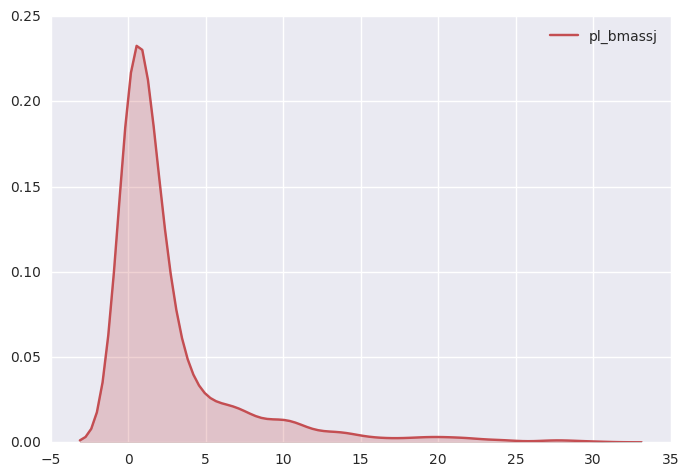

In [156]:
sb.kdeplot(df.pl_bmassj.dropna(), shade=True, color="r")# to limit density curve to: cut=0)

### bivariate density
Error: all the input array dimensions except for the concatenation axis must match exactly

ValueError: all the input array dimensions except for the concatenation axis must match exactly

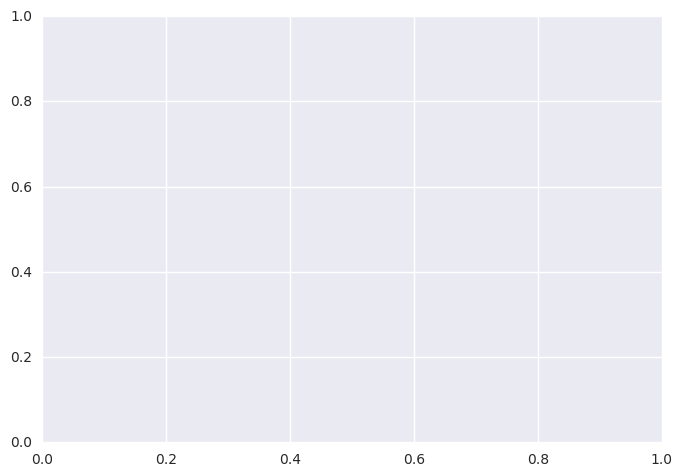

In [154]:
sb.kdeplot(df.pl_bmassj.dropna(), df.pl_radj.dropna(), shade=True)

Let's divide the file into separate dataframes based on detection method.

In [7]:
idx1 = df['pl_discmethod'] == 'Transit'
df_transit = df[idx1]
#to bypass use of dummy indices:
#virginica = iris.loc[iris.species == "virginica"]

idx2 = df['pl_discmethod'] == 'Radial Velocity'
df_RV = df[idx2]

idx3 = df['pl_discmethod'] == 'Imaging'
df_DI = df[idx3]

idx4 = df['pl_discmethod'] == 'Microlensing'
df_ML = df[idx4]

idx5 = df['pl_discmethod'] == 'Astrometry'
df_A = df[idx5]

idx6 = df['pl_discmethod'] == 'Transit Timing Variations'
df_TTV = df[idx6]

idx7 = df['pl_discmethod'] == 'Eclipse Timing Variations'
df_ETV = df[idx7]

idx8 = df['pl_discmethod'] == 'Pulsar Timing'
df_PT = df[idx8]

idx9 = df['pl_discmethod'] == 'Pulsation Timing Variations'
df_PTV = df[idx9]

idx10 = df['pl_discmethod'] == 'Orbital Brightness Modulation'
df_OBM = df[idx10]


'''
For multiple plots, try:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);
'''

In [ ]:
#pl.plot(df_transit['pl_radj'],df_transit['pl_bmassj'],'bo', alpha=0.1, label='transit ({})'.format(np.count_nonzero(df_transit['pl_radj']>0)))
#pl.plot(df_RV['pl_radj'],df_RV['pl_bmassj'],'bo', alpha=0.1, label='RV ({})'.format(np.count_nonzero(df_RV['pl_radj']>0)))
#pl.plot(df_TTV['pl_radj'],df_TTV['pl_bmassj'],'bo', alpha=0.1, label='TTV ({})'.format(np.count_nonzero(df_TTV['pl_radj']>0)))
#pl.plot(df_DI['pl_radj'],df_DI['pl_bmassj'],'bo', alpha=0.1, label='imaging ({})'.format(np.count_nonzero(df_DI['pl_radj']>0)))
pl.xlabel('Planet Radius [$R_{Jup}$]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
#pl.xlim([5e-3, 1e5])
pl.xscale('log')
pl.yscale('log')
pl.plot(R_E/R_J,M_E/M_J,'k*', markersize=12, label='Earth')
pl.plot(R_N/R_J,M_N/M_J,'ks', markersize=12, label='Neptune')
pl.plot(1,1,'k^', markersize=12, label='Jupiter')
leg = pl.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

# Stellar Properties

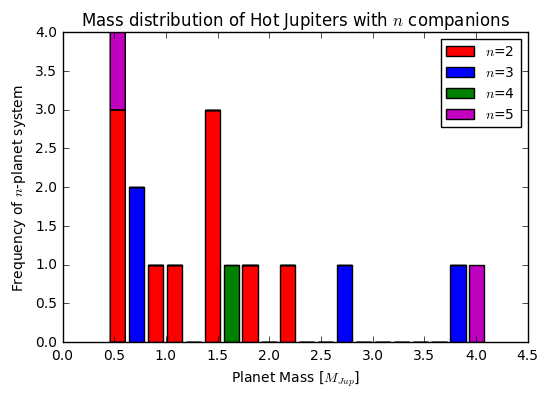

In [28]:
colors = ['r','b','g','m']
labels = ['$n$=2','$n$=3','$n$=4','$n$=5']
pl.hist([HJ2['pl_bmassj'],HJ3['pl_bmassj'],HJ4['pl_bmassj'],HJ5['pl_bmassj']], bins=20, color=colors, stacked=True, label=labels)
pl.xlabel('Planet Mass [$M_{Jup}$]')
pl.ylabel('Frequency of $n$-planet system')
pl.title('Mass distribution of Hot Jupiters with $n$ companions')
pl.legend(loc=1, fontsize=10)
#pl.text(x,y,'')

Similarly, there are many multiplanetary systems whose planets have < 1 Jupiter-masses  (super-Earths/mini-Neptunes?).

Is the bump at mass = 4 Mjup (for n-5) a real feature?

### 3. Nearly one-third of hot Jupiters have orbital paths that are inclined with respect to their star's equator, and several planets in the population rotate in the opposite direction to the star

In [29]:
df_hot_jup.query('pl_orbincl > 50').head()

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_denslim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,st_metfeblend,st_age,st_ageerr1,st_ageerr2,st_agelim
63,64,CoRoT-11,b,Transit,1,2.994330,0.000011,-0.000011,0.0,0.04360,...,0.0,-0.03,0.08,-0.08,0.0,0.0,2.000,1.000,-1.000,0.0
64,65,CoRoT-12,b,Transit,1,2.828042,0.000013,-0.000013,0.0,0.04016,...,0.0,0.16,0.10,-0.10,0.0,0.0,6.300,3.100,-3.100,0.0
65,66,CoRoT-13,b,Transit,1,4.035190,0.000030,-0.000030,0.0,0.05100,...,0.0,0.01,0.07,-0.07,0.0,0.0,1.635,1.515,-1.515,0.0
66,67,CoRoT-14,b,Transit,1,1.512140,0.000130,-0.000130,0.0,0.02700,...,0.0,0.05,0.15,-0.15,0.0,0.0,4.200,3.800,-3.800,0.0
67,68,CoRoT-16,b,Transit,1,5.352270,0.000200,-0.000200,0.0,0.06180,...,0.0,0.19,0.06,-0.06,0.0,0.0,6.730,2.800,-2.800,0.0


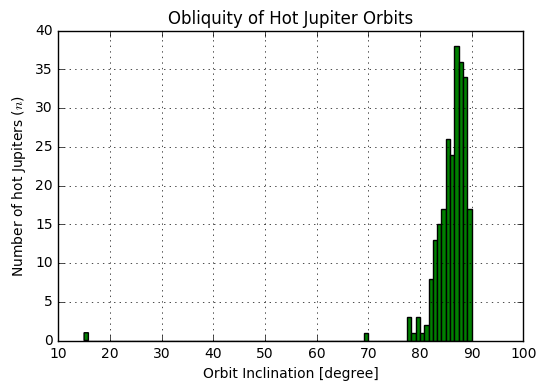

In [30]:
df_hot_jup['pl_orbincl'].hist(bins=90, color='g')
pl.xlabel('Orbit Inclination [degree]')
pl.ylabel('Number of hot Jupiters ($n$)')
pl.title('Obliquity of Hot Jupiter Orbits')
#pl.text(x,y,'')

Note that orbital inclination is at least 15 degrees. 

In [31]:
df_hot_jup.query('pl_hostname == "HAT-P-7"')

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_denslim,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,st_metfeblend,st_age,st_ageerr1,st_ageerr2,st_agelim
199,200,HAT-P-7,b,Transit,1,2.204737,0.000001,-0.000001,0.0,0.03676,...,NaN,0.15,0.08,-0.08,0.0,0.0,NaN,NaN,NaN,0.0


## Mass-radius relation of hot Jupiters

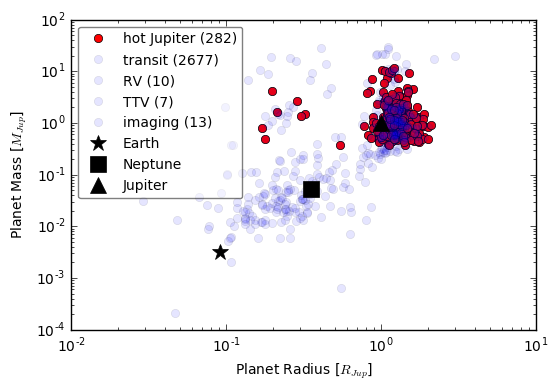

In [33]:
#seaborn.set()
pl.plot(df_hot_jup['pl_radj'],df_hot_jup['pl_bmassj'],'ro', label='hot Jupiter ({})'.format(len(df_hot_jup)))
pl.plot(df_transit['pl_radj'],df_transit['pl_bmassj'],'bo', alpha=0.1, label='transit ({})'.format(np.count_nonzero(df_transit['pl_radj']>0)))
pl.plot(df_RV['pl_radj'],df_RV['pl_bmassj'],'bo', alpha=0.1, label='RV ({})'.format(np.count_nonzero(df_RV['pl_radj']>0)))
pl.plot(df_TTV['pl_radj'],df_TTV['pl_bmassj'],'bo', alpha=0.1, label='TTV ({})'.format(np.count_nonzero(df_TTV['pl_radj']>0)))
pl.plot(df_DI['pl_radj'],df_DI['pl_bmassj'],'bo', alpha=0.1, label='imaging ({})'.format(np.count_nonzero(df_DI['pl_radj']>0)))
pl.xlabel('Planet Radius [$R_{Jup}$]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
#pl.xlim([5e-3, 1e5])
pl.xscale('log')
pl.yscale('log')
pl.plot(R_E/R_J,M_E/M_J,'k*', markersize=12, label='Earth')
pl.plot(R_N/R_J,M_N/M_J,'ks', markersize=12, label='Neptune')
pl.plot(1,1,'k^', markersize=12, label='Jupiter')
leg = pl.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jerome\Miniconda3\envs\finance\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


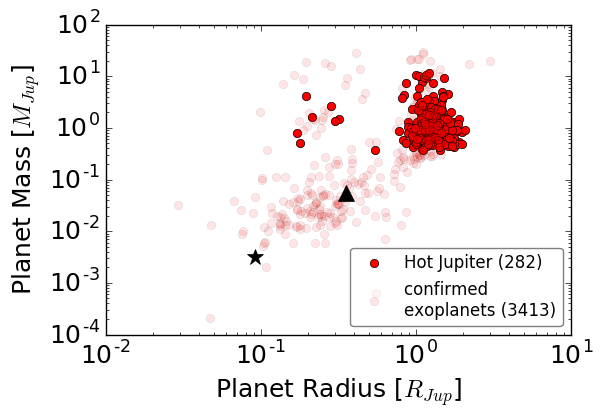

In [34]:
from matplotlib import pylab as pl
%pylab inline
matplotlib.rcParams.update({'font.size': 18})

pl.plot(df_hot_jup['pl_radj'],df_hot_jup['pl_bmassj'],'ro')
pl.plot(df_transit['pl_radj'],df_transit['pl_bmassj'],'ro', alpha=0.1)
pl.plot(df_RV['pl_radj'],df_RV['pl_bmassj'],'ro', alpha=0.1)#, label=None)
pl.plot(df_ML['pl_radj'],df_ML['pl_bmassj'],'ro', alpha=0.1)#, label=None)
pl.plot(df_DI['pl_radj'],df_DI['pl_bmassj'],'ro', alpha=0.1)#, label=None)
pl.xlabel('Planet Radius [$R_{Jup}$]')
pl.ylabel('Planet Mass [$M_{Jup}$]')
#pl.xlim([5e-3, 1e5])
pl.xscale('log')
pl.yscale('log')
pl.plot(R_E/R_J,M_E/M_J,'k*', markersize=12, label='Earth')
pl.plot(R_N/R_J,M_N/M_J,'k^', markersize=12, label='Neptune')
label1=str('Hot Jupiter ({})'.format(len(df_hot_jup)))
label2=str('confirmed \nexoplanets ({})'.format(len(df)))
leg = pl.legend([label1,label2], fancybox=True, loc=4, numpoints = 1, fontsize=12)
leg.get_frame().set_alpha(0.5)
pl.show()

As mentioned above, there is extreme overlap in the region/parameter space occupied by hot Jupiters (red) and other confirmed exoplanets (blue).  

# General properties of hot Jupiters
## Validate the following.

Their defining characteristics are their large masses and short orbital periods, spanning 0.36–11.8 Jupiter masses and 1.3–111 Earth days.[8] The mass cannot be greater than approximately 13.6 Jupiter masses because then the planet would start burning deuterium and become a brown dwarf.[9]


Most have nearly circular orbits (low eccentricities). It is thought that their orbits are circularized by perturbations from nearby stars or tidal forces.[10]
Many have unusually low densities. The lowest one measured thus far is that of TrES-4 at 0.222 g/cm3.[11] The large radii of hot Jupiters are not yet fully understood but it is thought that the expanded envelopes can be attributed to high stellar irradiation, high atmospheric opacities, possible internal energy sources, and orbits close enough to their stars for the outer layers of the planets to exceed their Roche limit and be pulled further outward.[11][12]


They are likely to have extreme and exotic atmospheres due to their short periods, relatively long days, and tidal locking. Atmospheric dynamics models predict strong vertical stratification with intense winds and super-rotating equatorial jets driven by radiative forcing and the transfer of heat and momentum.[13][14] The day-night temperature difference at the photosphere is predicted to be substantial, approximately 500 K for a model based on HD 209458b.[14]


They appear to be more common around F- and G-type stars and less so around K-type stars. Hot Jupiters around red dwarfs are very rare.[15] Generalizations about the distribution of these planets must take into account the various observational biases.


In-situ formation
It is also theorized that a substantial fraction of hot Jupiters may have formed in-situ via the core accretion method of planetary formation.[22] This theory is particularly attractive because it has measurable consequences including the expectation that hot Jupiters should frequently be accompanied by additional low-mass planets with periods shorter than ~100 days. Traditionally, this mode of conglomeration has been disfavored due to the fact that there may not be enough solid material orbiting close to the star to allow for the in situ assembly of massive cores, which are necessary for the formation of hot Jupiters.[23][24] Recent surveys, however, have found that the inner regions of planetary systems are not empty, and are frequently occupied by super-Earth type planets.[25][26] Yet, direct calculations indicate that in situ formation of super-Earths in the close proximity of a solar-mass star require surface densities of solids ≈ 104 g/cm2, or larger.[27]


Terrestrial planets in systems with hot Jupiters
Simulations have shown that the migration of a Jupiter-sized planet through the inner protoplanetary disk (the region between 5 and 0.1 AU from the star) is not as destructive as one might assume. More than 60% of the solid disk materials in that region are scattered outward, including planetesimals and protoplanets, allowing the planet-forming disk to reform in the gas giant's wake.[28] In the simulation, planets up to two Earth masses were able to form in the habitable zone after the hot Jupiter passed through and its orbit stabilized at 0.1 AU. Due to the mixing of inner-planetary-system material with outer-planetary-system material from beyond the frost line, simulations indicated that the terrestrial planets that formed after a hot Jupiter's passage would be particularly water-rich.[28]


It has been found that several hot Jupiters have retrograde orbits and this calls into question the theories about the formation of planetary systems,[31] although rather than a planet's orbit having been disturbed, it may be that the star itself flipped over early in their system's formation due to interactions between the star's magnetic field and the planet-forming disc.[32] By combining new observations with the old data it was found that more than half of all the hot Jupiters studied have orbits that are misaligned with the rotation axis of their parent stars, and six exoplanets in this study have retrograde motion.


Recent research has found that several hot Jupiters are in misaligned systems.[33][34] This misalignment may be related to the heat of the photosphere the hot Jupiter is orbiting. There are many proposed theories as to why this might occur. One such theory involves tidal dissipation and suggests there is a single mechanism for producing hot Jupiters and this mechanism yields a range of obliquities. Cooler stars with higher tidal dissipation damps the obliquity (explaining why hot Jupiters orbiting cooler stars are well aligned) while hotter stars do not damp the obliquity (explaining the observed misalignment).[8]


Ultra-short-period Jupiters
Ultra-short-period Jupiters are a class of hot Jupiters with orbital periods below 1 day and occur only around stars of less than about 1.25 solar masses.[35]


Five ultra-short-period planet candidates have been identified in the region of the Milky Way known as the galactic bulge. Confirmed transiting hot Jupiters that have orbital periods of less than one day include WASP-18b, WASP-19b, WASP-43b and WASP-103b.[36]


Puffy planets
Gas giants with a large radius and very low density are sometimes called "puffy planets"[37] or "hot Saturns", due to their density being similar to Saturn's. Puffy planets orbit close to their stars so that the intense heat from the star combined with internal heating within the planet will help inflate the atmosphere. Six large-radius low-density planets have been detected by the transit method. In order of discovery they are: HAT-P-1b,[38][39] COROT-1b, TrES-4, WASP-12b, WASP-17b, and Kepler-7b. Some hot Jupiters detected by the radial-velocity method may be puffy planets. Most of these planets are below two Jupiter masses as more massive planets have stronger gravity keeping them at roughly Jupiter's size.
Hot Jupiters around red giants
It has been proposed that, even though no planet of this type has been found until now, gas giants orbiting red giants at distances similar to that of Jupiter could be hot Jupiters due to the intense irradiation they would receive from their stars. It is very likely that in the Solar System Jupiter will become a hot Jupiter after the transformation of the Sun into a red giant.[43]


Hot Jupiters orbiting red giants would differ from those orbiting main-sequence stars in a number of ways, most notably the possibility of accreting material from the stellar winds of their stars and, assuming a fast rotation (not tidally locked to their stars), a much more evenly distributed heat with many narrow-banded jets. Their detection using the transit method would be much more difficult due to their tiny size compared to the stars they orbit, as well as the long time needed (months or even years) for one to transit their star as well as to be occulted by it.


It has been shown that approximately 50% of hot Jupiters have distant Jupiter-mass or larger companions.[20]

"If we want to know how many potentially habitable Earth-like planets are there, having one hot Jupiter rampaging their way though the inner part of the planetary system, and it could toss out your habitable earth and put it into either a much closer orbit or a much further orbit. So knowing how things have moved around will tell you a lot about where you might find interesting planets.” -Kate Knudson

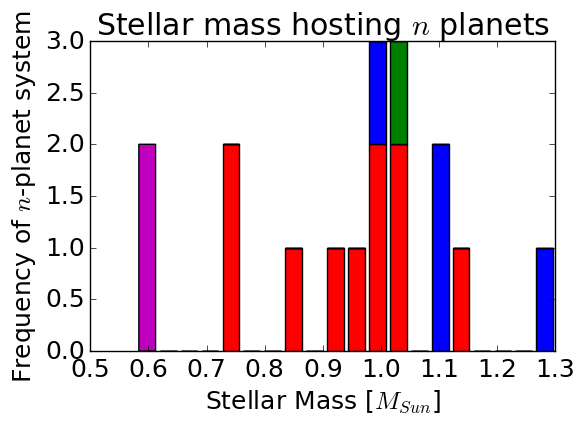

In [35]:
colors = ['r','b','g','m']
labels = ['$n$=2','$n$=3','$n$=4','$n$=5']
pl.hist([HJ2['st_mass'],HJ3['st_mass'],HJ4['st_mass'],HJ5['st_mass']], bins=20, color=colors, stacked=True, label=labels)
pl.xlabel('Stellar Mass [$M_{Sun}$]')
pl.ylabel('Frequency of $n$-planet system')
pl.title('Stellar mass hosting $n$ planets')
#pl.legend()

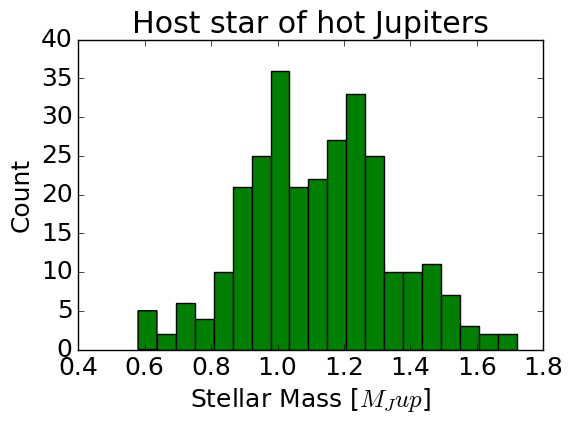

In [36]:
colors = ['r','b','g','m']
labels = ['$n$=2','$n$=3','$n$=4','$n$=5']
#pl.hist([HJ2['st_mass'],HJ3['st_mass'],HJ4['st_mass'],HJ5['st_mass']], bins=20, color=colors, stacked=True, label=labels)
pl.hist(df_hot_jup['st_mass'], bins=20, color='g')
pl.xlabel('Stellar Mass [$M_Jup$]')
pl.ylabel('Count')
pl.title('Host star of hot Jupiters')

In [37]:
df_hot_jup['st_age'].fillna(None, inplace=False)

ValueError: must specify a fill method or value

In [ ]:
colors = ['r','b','g','m']
labels = ['$n$=2','$n$=3','$n$=4','$n$=5']
#pl.hist([HJ2['st_mass'],HJ3['st_mass'],HJ4['st_mass'],HJ5['st_mass']], bins=20, color=colors, stacked=True, label=labels)
pl.hist(df_hot_jup['st_age'], bins=20, color='g')
pl.xlabel('Stellar Age [Gyr]')
pl.ylabel('Count')
pl.title('Host star of hot Jupiters')

The discovery of “hot Jupiters” very close to their parent stars confirmed that Jovian planets
migrate inward via several potential mechanisms. We present empirical constraints on planet
migration halting mechanisms. We compute model density functions of close-in exoplanets in the
orbital semi-major axis – stellar mass plane to represent planet migration that is halted via several
mechanisms, including the interior 1:2 resonance with the magnetospheric disk truncation radius,
the interior 1:2 resonance with the dust sublimation radius, and several scenarios for tidal halting.

They found that hot Jupiters circling more massive stars orbited relatively farther out, just as theory number three — the "orbit circularization" idea — had predicted.

http://www.space.com/15572-earth-alien-planets-hot-jupiters.html

## K-Means Clustering
Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
#from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_hot_jup['mass'] = LabelEncoder().fit_transform(df_hot_jup['pl_bmassj'])
df_hot_jup['radius'] = LabelEncoder().fit_transform(df_hot_jup['pl_radj'])

In [ ]:
df_hot_jup['radius'].head()

In [ ]:
from sklearn import neighbors, datasets

#iris = datasets.load_iris()
#X, y = iris.data, iris.target

#X, y =  df_hot_jup['radius'], df_hot_jup['mass']

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters we looked at previously. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
X

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

In [ ]:
X =  np.asarray([df_hot_jup['radius'].values, df_hot_jup['mass'].values])
X

In [ ]:
shape(X)

In [ ]:
from sklearn.cluster import KMeans
est = KMeans(2)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

## The K-Means Algorithm: Expectation Maximization

K-Means is an example of an algorithm which uses an *Expectation-Maximization* approach to arrive at the solution.
*Expectation-Maximization* is a two-step approach which works as follows:

1. Guess some cluster centers
2. Repeat until converged
A. Assign points to the nearest cluster center
B. Set the cluster centers to the mean 
   
Let's quickly visualize this process:

In [ ]:
from fig_code import plot_kmeans_interactive
plot_kmeans_interactive();

This algorithm will (often) converge to the optimal cluster centers.

### KMeans Caveats

* The convergence of this algorithm is not guaranteed; for that reason, by default scikit-learn uses a large number of random initializations and finds the best results.

* The number of clusters must be set beforehand.  There are other clustering algorithms for which this requirement may be lifted.

# Dimensionality Reducton: Principal Component Analysis (PCA)
Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn import neighbors, datasets

import pylab as pl

seaborn.set()

iris = datasets.load_iris()

X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

# Dimensionality Reduction: Principal Component Analysis in-depth

Here we'll explore **Principal Component Analysis**, which is an extremely useful linear dimensionality reduction technique.  Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data.  Look for directions in the data with the most variance.

Useful to explore data, visualize data and relationships.

It's easiest to visualize by looking at a two-dimensional dataset:

In [ ]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [ ]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [ ]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [ ]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

Isomap: manifold learning, good when PCA doesn't work like in a loop.  Large number of datasets, can use randomized PCA.
By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

In [ ]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.